### Steel faults detection using Ensemble Learning


##### Load all the important libraries

In [12]:
# Libraries for Required Operations

import numpy as np  # for linear algebra
import pandas as pd  # for data processing

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split, GridSearchCV

# System
import os
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
print(os.listdir("."))


['faults.csv', 'Steel_faults_detection.ipynb']


In [14]:
# Loading the dataset
dataset_temp = pd.read_csv("faults.csv")

# Summary information of the dataset
dataset_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [15]:
dataset_temp.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [16]:
# Columns indicating fault class
label_columns = dataset_temp.columns.values[-7:]

# Columns indicating fault class are grouped under the 'target' column
targets = (dataset_temp.iloc[:, -7:] == 1).idxmax(1)

# Columns indicating fault class are removed from the dataset
dataset = dataset_temp.drop(label_columns, axis=1)

# The created target class is added to the dataset
dataset['target'] = targets
print("Fault columns are combined into one column...")


Fault columns are combined into one column...


##### Overview of the Dataset

In [17]:
# Size of the dataset
dataset_shape = dataset.shape
print("Dataset Size:", dataset_shape)


Dataset Size: (1941, 28)


In [18]:
# First 5 rows of the dataset
dataset_head = dataset.head()
print("\nFirst 5 Rows of the Dataset:\n", dataset_head)



First 5 Rows of the Dataset:
    X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter   
0         42         50     270900     270944           267           17  \
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity   
0           44              24220                     76  \
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index   
0                    108  ...         0.4706         1.0000  \
1                    123 

In [19]:
# Statistical summary of all features in the dataset
dataset_description = dataset.describe()
print("\nStatistical Summary of the Dataset:\n", dataset_description)



Statistical Summary of the Dataset:
          X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas   
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000  \
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity   
count   1941.000000   1941.000000       1.941000e+03            1941.000000  \
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187   

In [20]:
# Distribution of the class variable
class_distribution = dataset['target'].value_counts()
print("\nDistribution of the Class Variable:\n", class_distribution)



Distribution of the Class Variable:
 target
Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64


In [23]:
dataset['target'].describe()

count             1941
unique               7
top       Other_Faults
freq               673
Name: target, dtype: object

#### Class Distributions
Let's examine the distribution of the output (class, target) variable in the dataset.

In [24]:
print(dataset['target'].value_counts())


target
Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64


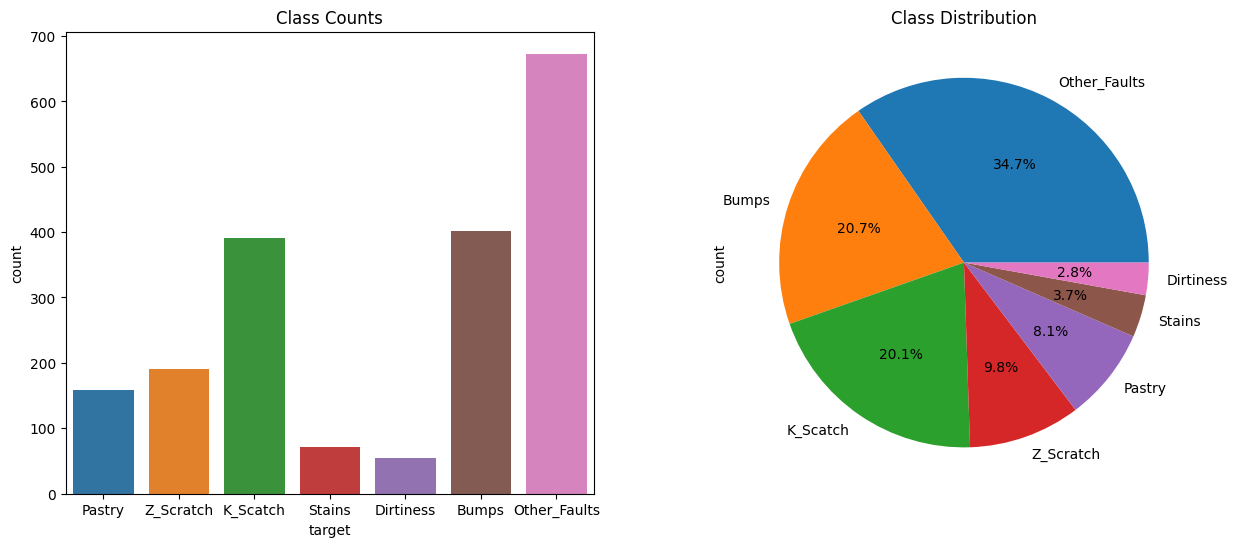

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='target', data=dataset, ax=ax[0])
dataset['target'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

ax[0].set_title('Class Counts')
ax[1].set_title('Class Distribution')
plt.show()


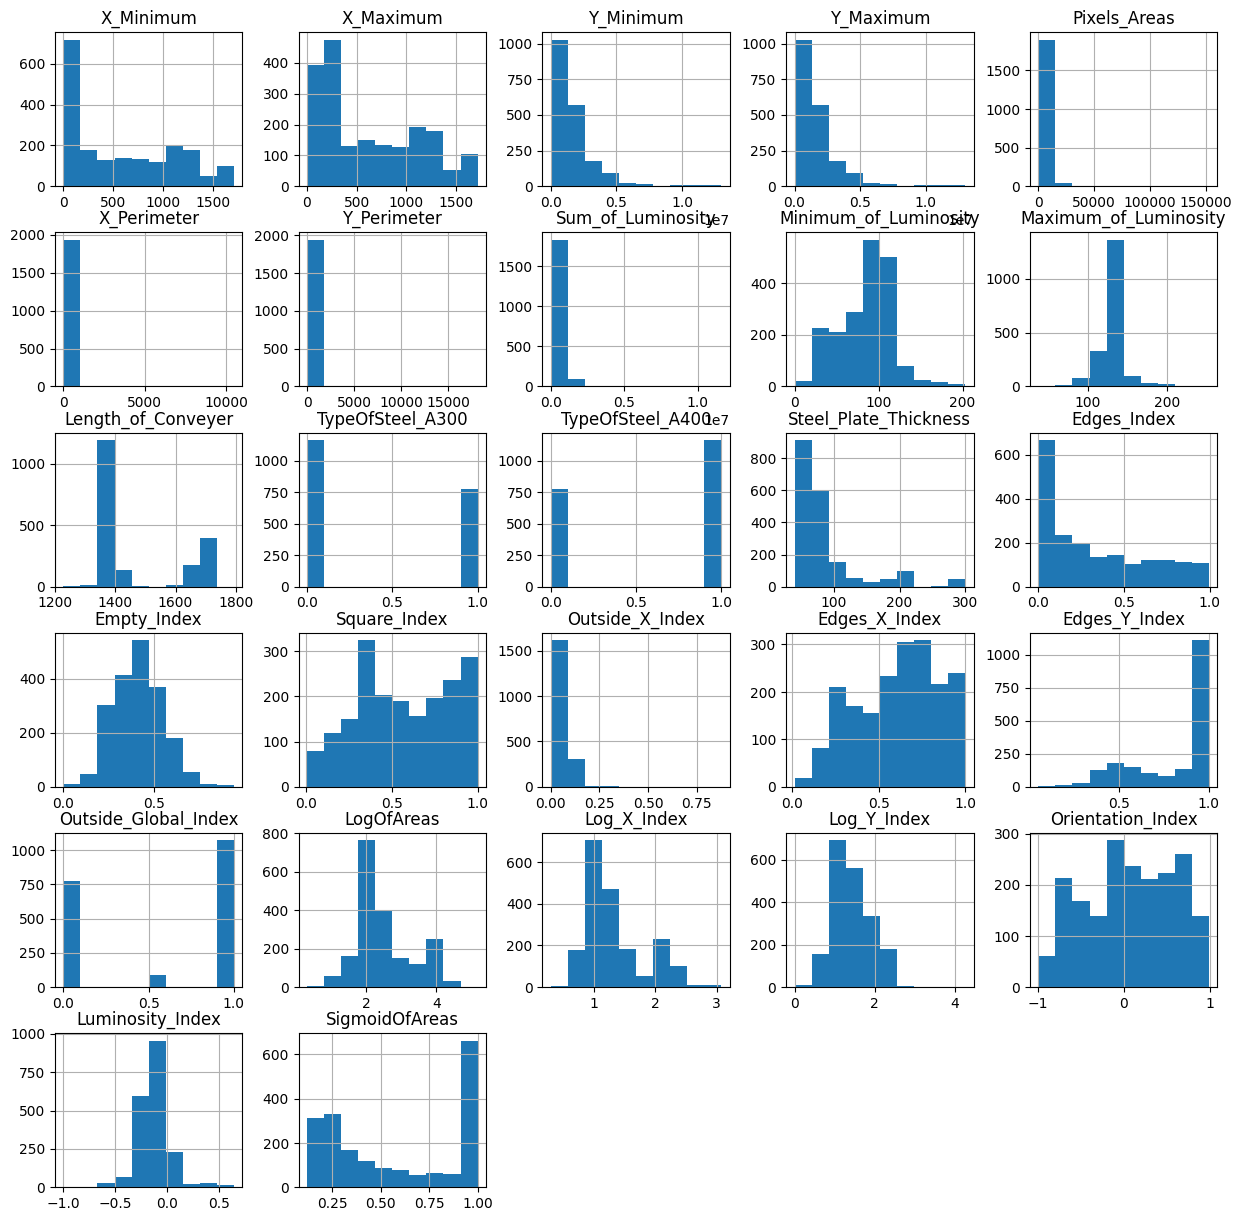

In [26]:
dataset.hist(figsize=(15,15))
plt.show()

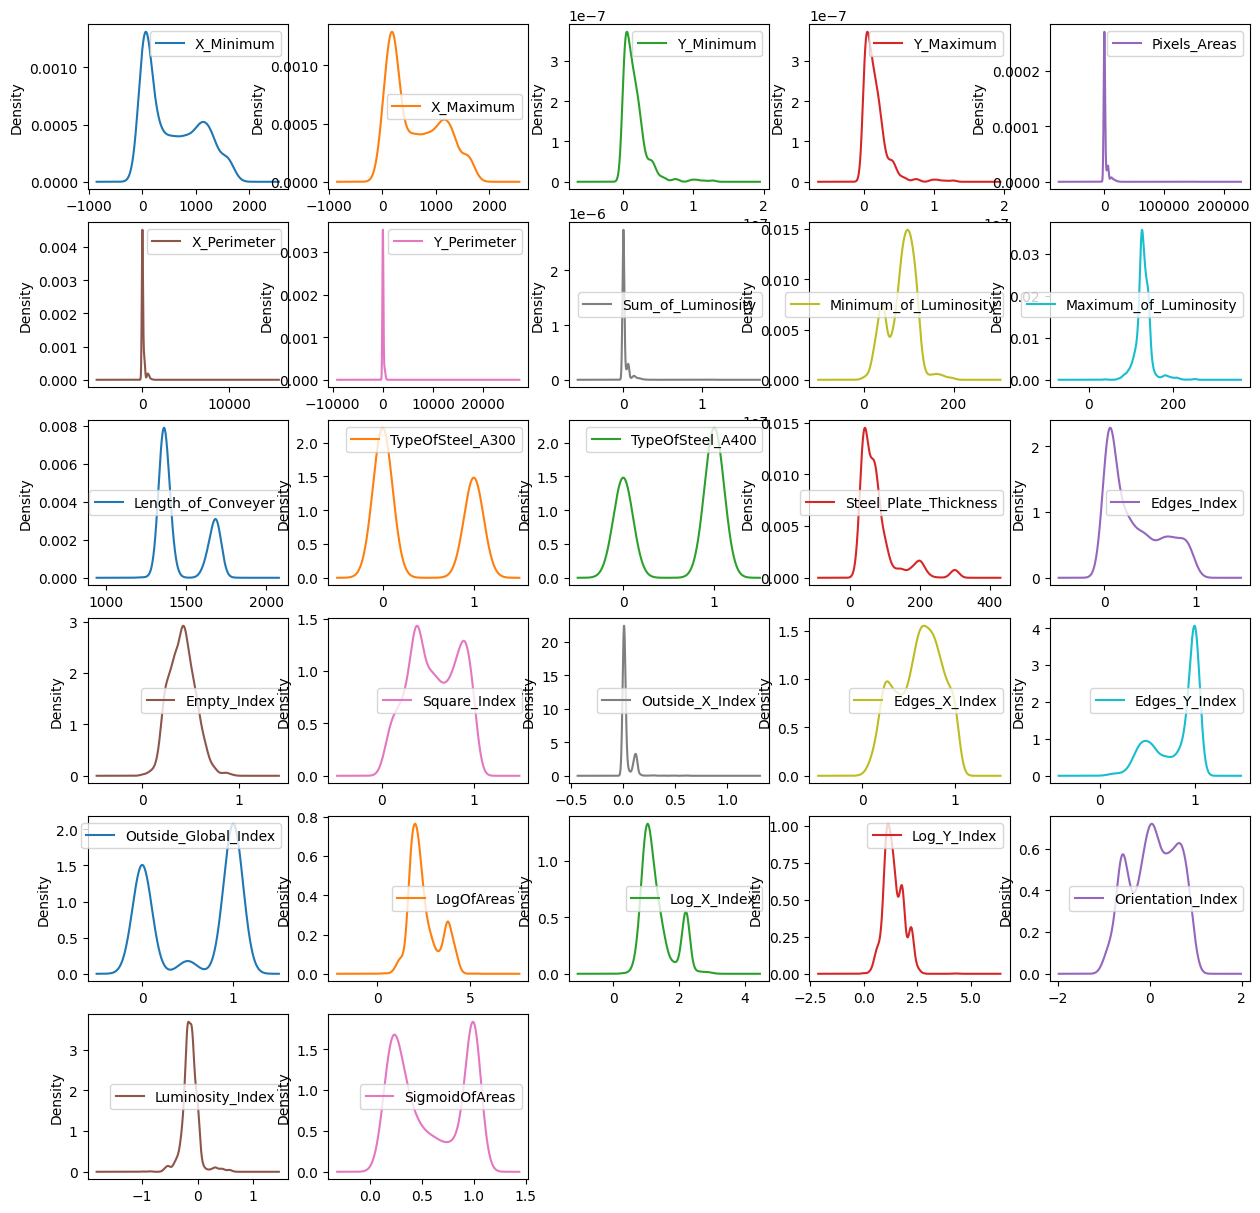

In [27]:
dataset.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

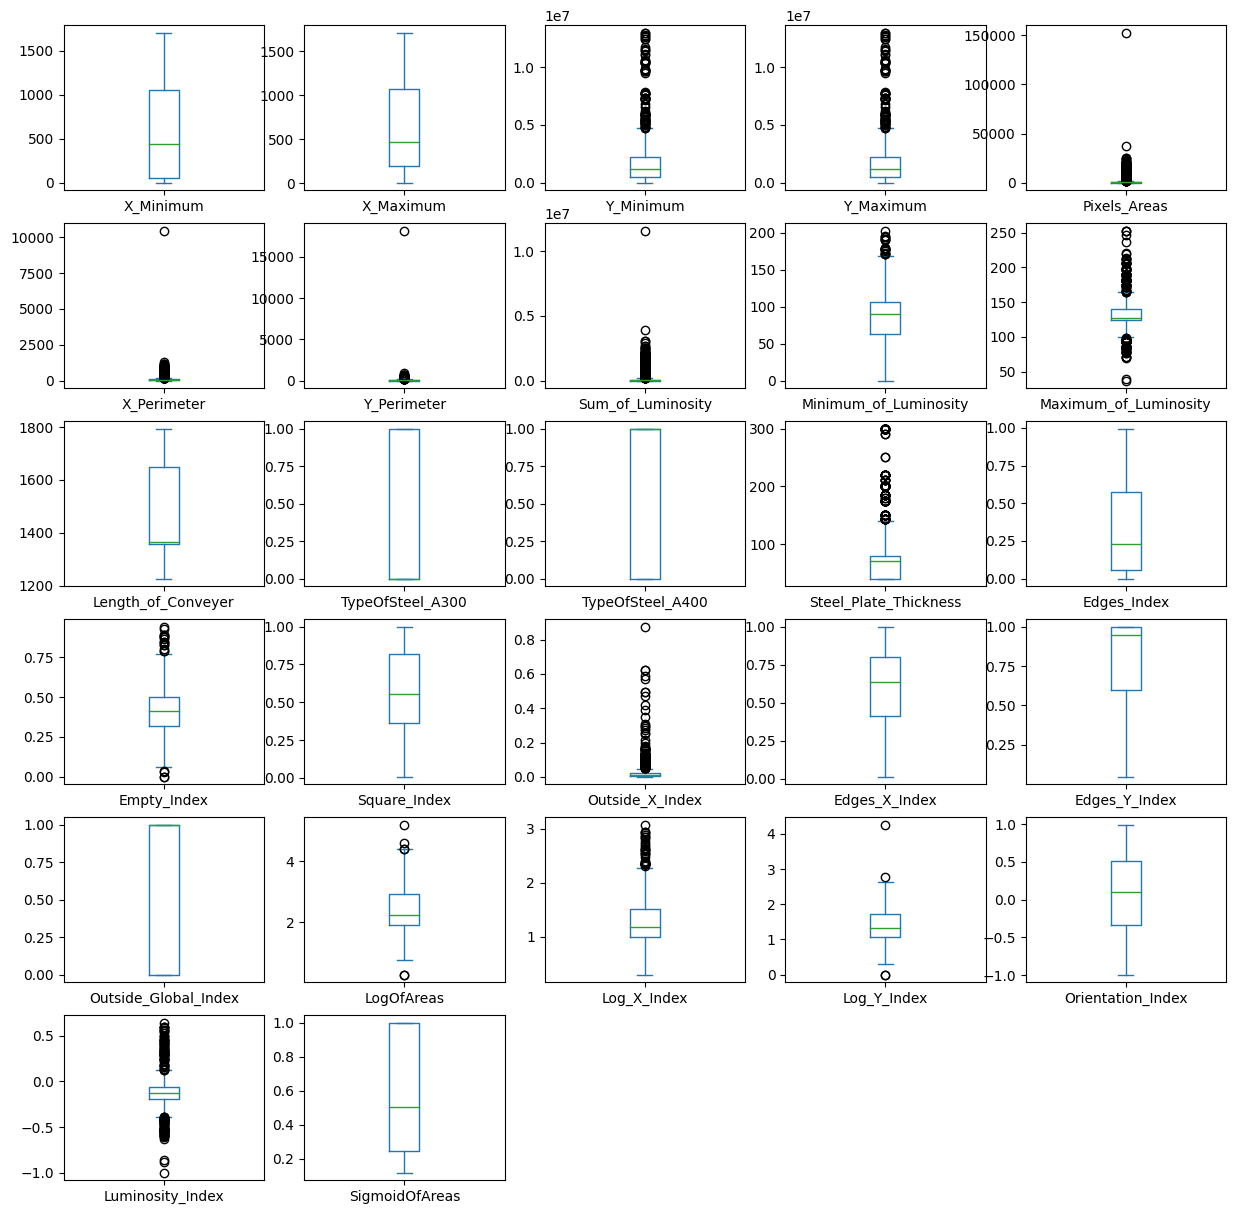

In [28]:
dataset.plot(kind='box', layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15) )
plt.show()

In [29]:
# Different graphs showing the relationship between classes and features:
# boxplot, violinplot, pointplot, barplot
def draw_bivariate_plot(dataset, rows, cols, plot_type):
    column_names = dataset.columns.values
    number_of_column = len(column_names)
    fig, axarr = plt.subplots(rows, cols, figsize=(22, 16))

    counter = 0
    for i in range(rows):
        for j in range(cols):
            if column_names[counter] == 'target':
                break
            if 'violin' in plot_type:
                sns.violinplot(x='target', y=column_names[counter], data=dataset, ax=axarr[i][j])
            elif 'box' in plot_type:
                sns.boxplot(x='target', y=column_names[counter], data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='target', y=column_names[counter], data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='target', y=column_names[counter], data=dataset, ax=axarr[i][j])

            counter += 1
            if counter == (number_of_column - 1,):
                break


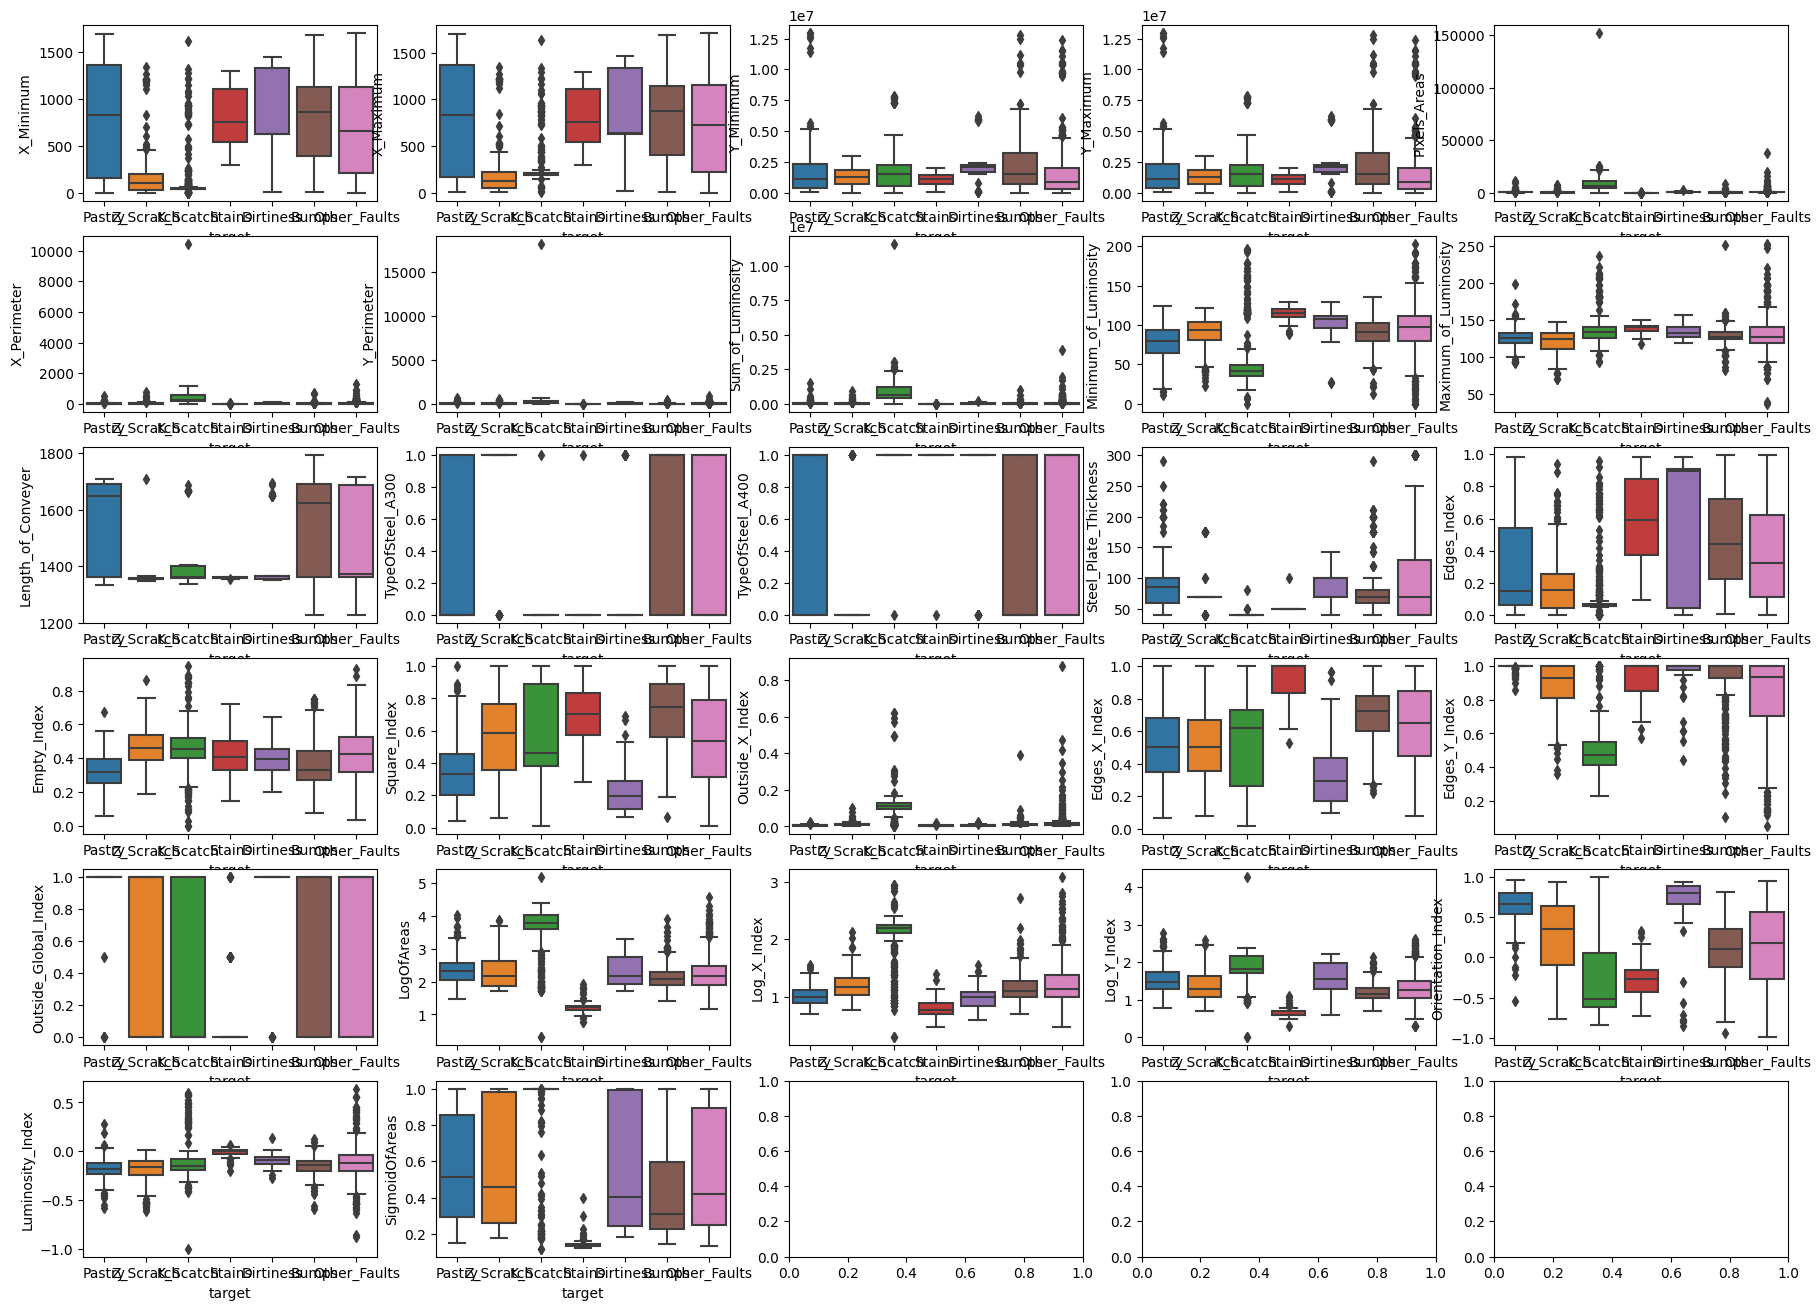

In [30]:
draw_bivariate_plot(dataset=dataset, rows=6, cols=5,plot_type="box")

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()
X=dataset.drop('target',axis=1)
Y=le.fit_transform(dataset['target'])

In [33]:
kbest=SelectKBest(score_func=f_classif, k=6)
kbest.fit(X,Y)


SelectKBest(k=6)

In [34]:
k_best=kbest.get_support(indices=True)
feature_names=dataset.columns.values
k_best_feature_names=feature_names[k_best]
k_best_feature_names =np.append(k_best_feature_names,"target")

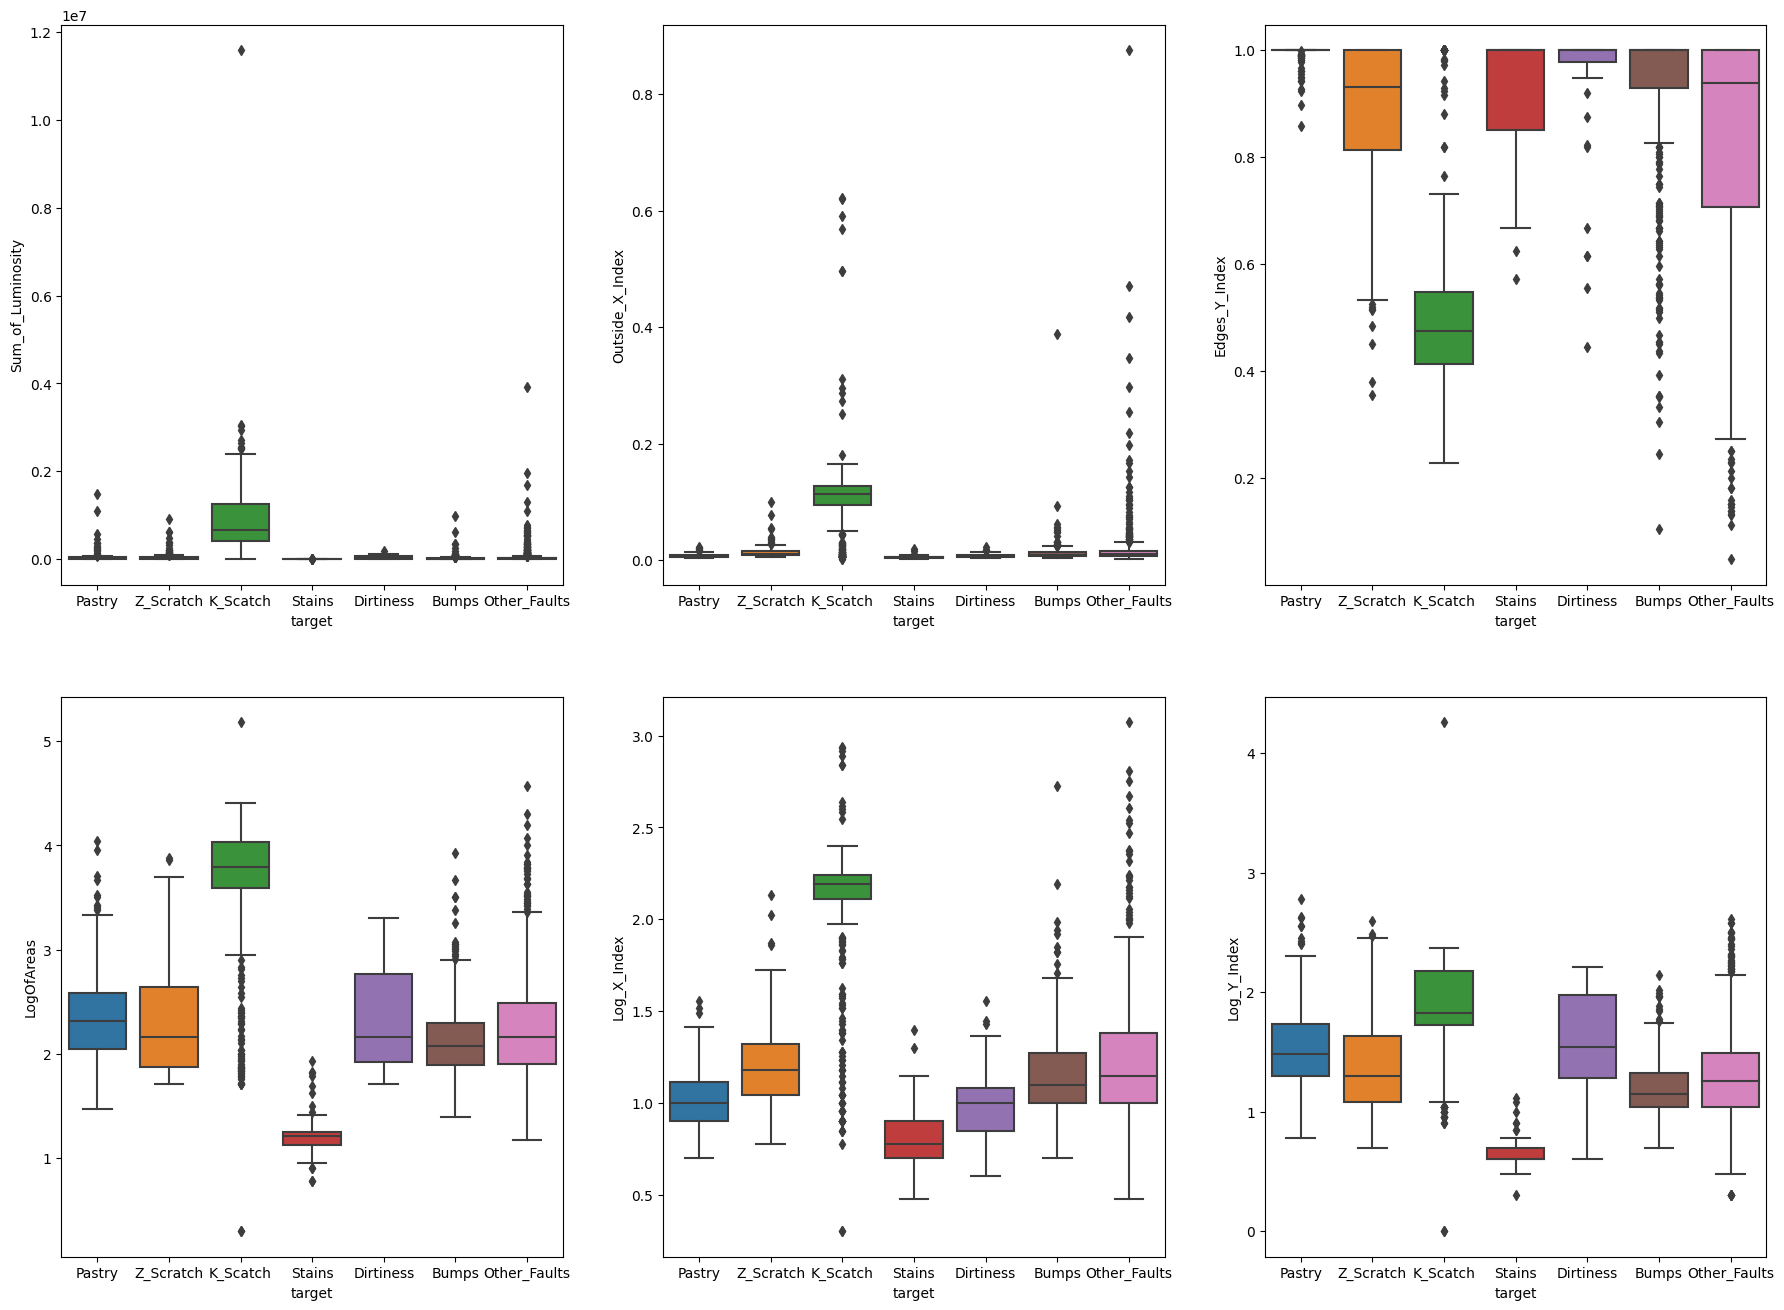

In [35]:
draw_bivariate_plot(dataset=dataset[k_best_feature_names], 
                    rows=2, cols=3,plot_type="box")

In [36]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="d") 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [37]:
def get_train_test(dataset):
    # Features and target variable
    X = dataset.drop('target', axis=1)
    y = dataset['target']
    
    # Scaling the features since they are in different ranges
    standardScaler = StandardScaler()
    X = standardScaler.fit_transform(X)
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        stratify=y,  # Taking class imbalances into account
        test_size=0.3,  # 70% training, 30% testing
        random_state=42
    )
    
    return X_train, X_test, y_train, y_test


In [38]:
def MyGridSearch(clf, param_grid, dataset):
    """
    Perform grid search with cross-validation to find the best parameters for a given classifier.
    Evaluate the classifier's performance on the test set and display the confusion matrix and classification report.

    Parameters:
        clf: Classifier object (e.g., RandomForestClassifier(), SVC(), etc.)
        param_grid: Dictionary of parameter grid for grid search
        dataset: Dataset DataFrame containing features and target

    Returns:
        None
    """

    print("Classifier:", clf.__class__.__name__)

    # Get training and testing sets
    X_train, X_test, y_train, y_test = get_train_test(dataset)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5)

    # Fit the model on training data
    grid_search.fit(X_train, y_train)

    # Get the accuracy based on the best parameters
    accuracy = grid_search.score(X_test, y_test)

    # Print the accuracy
    print("Accuracy:", accuracy)

    # Print the best parameters found by grid search
    print("Best Parameters:", grid_search.best_params_)

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    draw_confusion_matrix(cm)

    # Print classification report
    print('Classification Report: \n', classification_report(y_test, y_pred))


Classifier: SVC
Accuracy: 0.7512864493996569
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


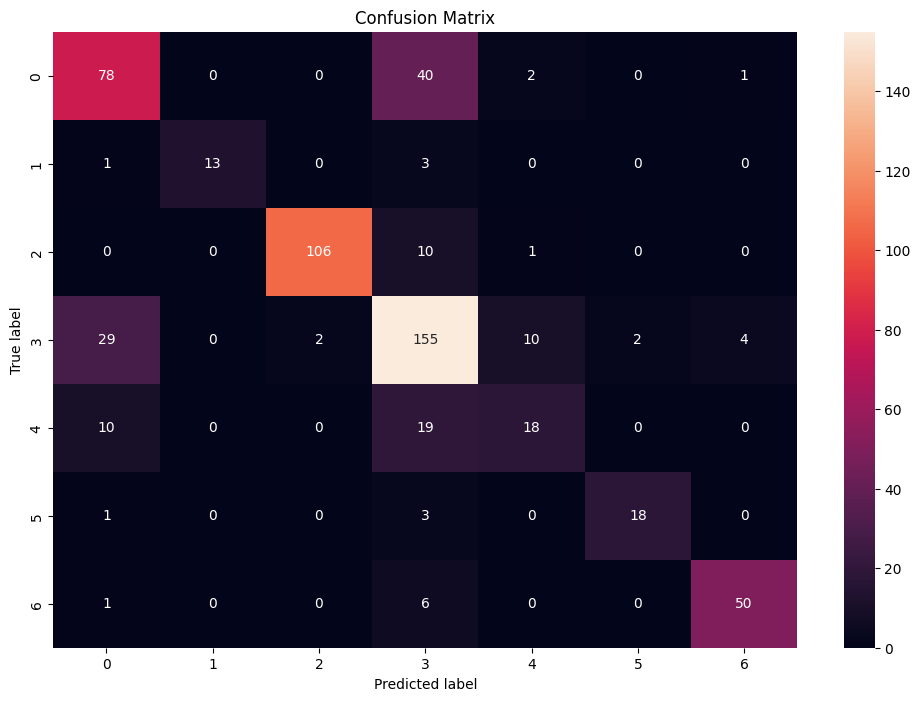

Classification Report: 
               precision    recall  f1-score   support

       Bumps       0.65      0.64      0.65       121
   Dirtiness       1.00      0.76      0.87        17
    K_Scatch       0.98      0.91      0.94       117
Other_Faults       0.66      0.77      0.71       202
      Pastry       0.58      0.38      0.46        47
      Stains       0.90      0.82      0.86        22
   Z_Scratch       0.91      0.88      0.89        57

    accuracy                           0.75       583
   macro avg       0.81      0.74      0.77       583
weighted avg       0.76      0.75      0.75       583



In [40]:
# Parameters for SVC
param_grid_svc = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Create SVC classifier
svc = SVC()

# Perform Grid Search for SVC
MyGridSearch(svc, param_grid_svc, dataset)

Classifier: RandomForestClassifier
Accuracy: 0.79073756432247
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


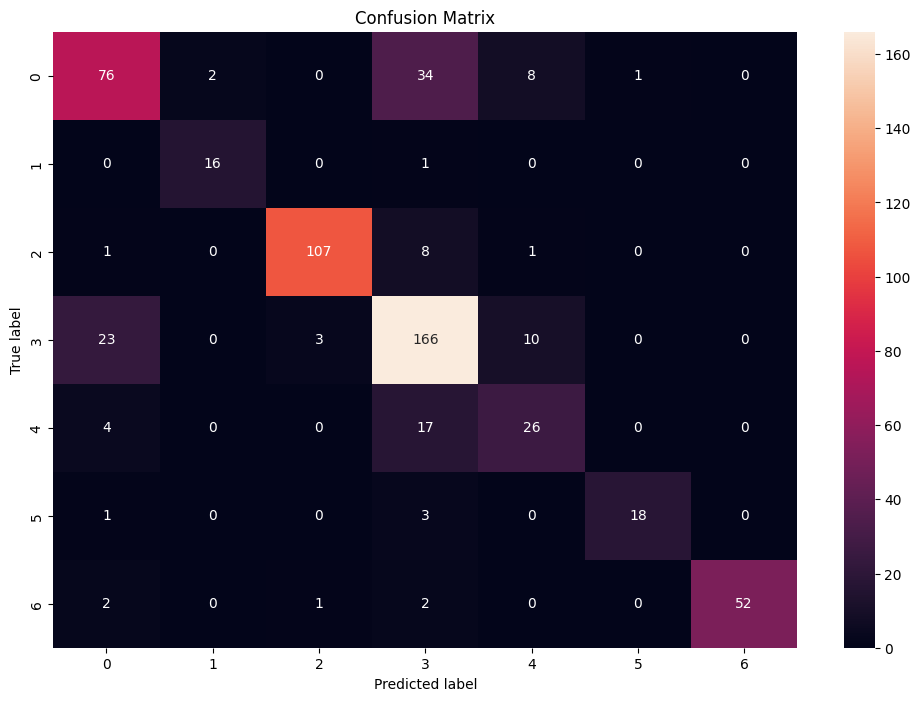

Classification Report: 
               precision    recall  f1-score   support

       Bumps       0.71      0.63      0.67       121
   Dirtiness       0.89      0.94      0.91        17
    K_Scatch       0.96      0.91      0.94       117
Other_Faults       0.72      0.82      0.77       202
      Pastry       0.58      0.55      0.57        47
      Stains       0.95      0.82      0.88        22
   Z_Scratch       1.00      0.91      0.95        57

    accuracy                           0.79       583
   macro avg       0.83      0.80      0.81       583
weighted avg       0.80      0.79      0.79       583



In [41]:
random_forest_param_grid = {
    "max_depth": [3, None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

MyGridSearch(RandomForestClassifier(n_estimators=48), random_forest_param_grid, dataset)


Classifier: RandomForestClassifier
Accuracy: 0.8044596912521441
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 48}


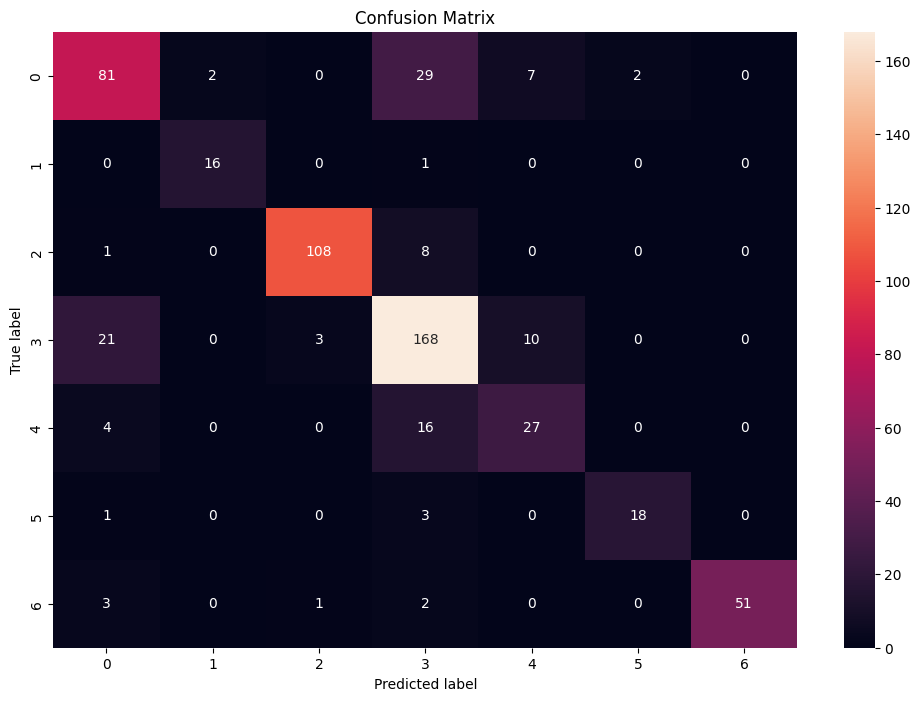

Classification Report: 
               precision    recall  f1-score   support

       Bumps       0.73      0.67      0.70       121
   Dirtiness       0.89      0.94      0.91        17
    K_Scatch       0.96      0.92      0.94       117
Other_Faults       0.74      0.83      0.78       202
      Pastry       0.61      0.57      0.59        47
      Stains       0.90      0.82      0.86        22
   Z_Scratch       1.00      0.89      0.94        57

    accuracy                           0.80       583
   macro avg       0.83      0.81      0.82       583
weighted avg       0.81      0.80      0.80       583



In [42]:
rfc_best_params={'n_estimators':[48],
    'bootstrap': [False], 
             'criterion': ['entropy'], 
             'max_depth': [None], 
             'max_features': [10], 
             'min_samples_leaf': [1], 
             'min_samples_split': [2]}
MyGridSearch(RandomForestClassifier(), rfc_best_params, dataset )

### Unsupervised Learning: Principal Component Analysis (PCA)

In [43]:
from sklearn.decomposition import PCA

In [44]:
 X_train,X_test,y_train,y_test=get_train_test(dataset)

In [45]:
pca=PCA(whiten=True)
pca.fit(X_train)

PCA(whiten=True)

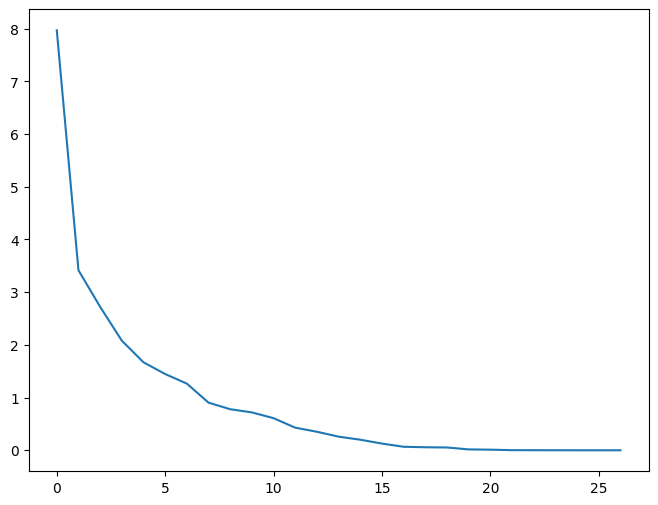

In [46]:
plt.figure(figsize=(8,6))
plt.plot(pca.explained_variance_)


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)  # Fit and transform on training data
X_test_pca = pca.transform(X_test)  # Transform test data

print("PCA transformation is completed.")


PCA transformation is completed.


In [49]:
from sklearn.svm import SVC

# Create SVM classifier
clf = SVC()

# Fit SVM on PCA-transformed training data
clf.fit(X_train_pca, y_train)

# Predict on PCA-transformed test data
y_pred = clf.predict(X_test_pca)

print("Predictions made on PCA-transformed dataset.")


Predictions made on PCA-transformed dataset.


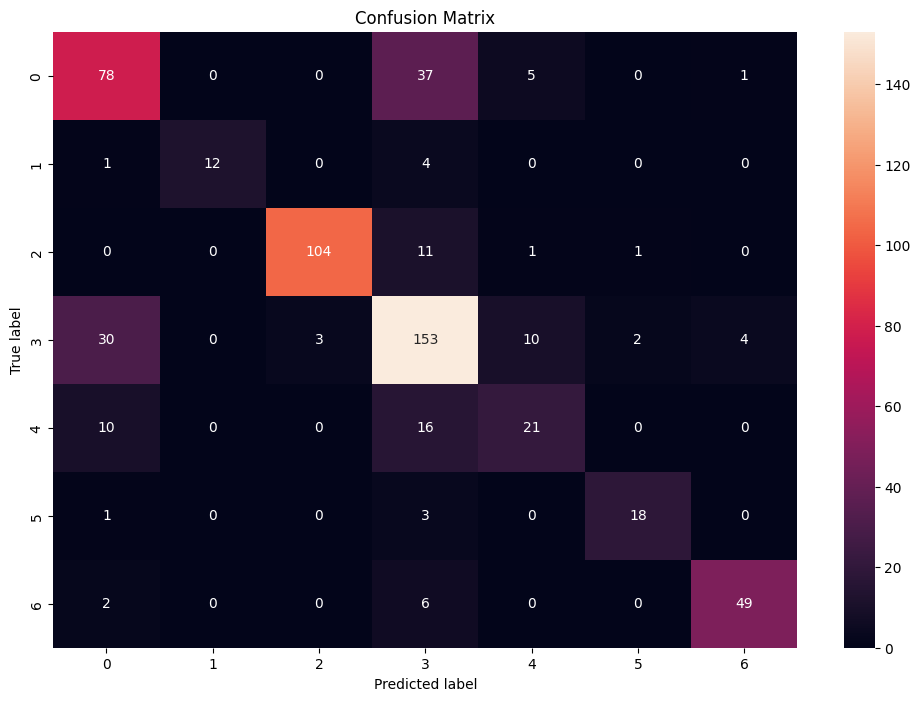

Accuracy Score: 0.75
Classification Report: 
               precision    recall  f1-score   support

       Bumps       0.64      0.64      0.64       121
   Dirtiness       1.00      0.71      0.83        17
    K_Scatch       0.97      0.89      0.93       117
Other_Faults       0.67      0.76      0.71       202
      Pastry       0.57      0.45      0.50        47
      Stains       0.86      0.82      0.84        22
   Z_Scratch       0.91      0.86      0.88        57

    accuracy                           0.75       583
   macro avg       0.80      0.73      0.76       583
weighted avg       0.75      0.75      0.75       583



In [50]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
draw_confusion_matrix(cm)

# Calculate and display accuracy score
accuracy = clf.score(X_test_pca, y_test)
print("Accuracy Score: {:.2f}".format(accuracy))

# Display classification report
print('Classification Report: \n', classification_report(y_test, y_pred))


In [58]:
from sklearn.pipeline import Pipeline

Model trained and predictions made...


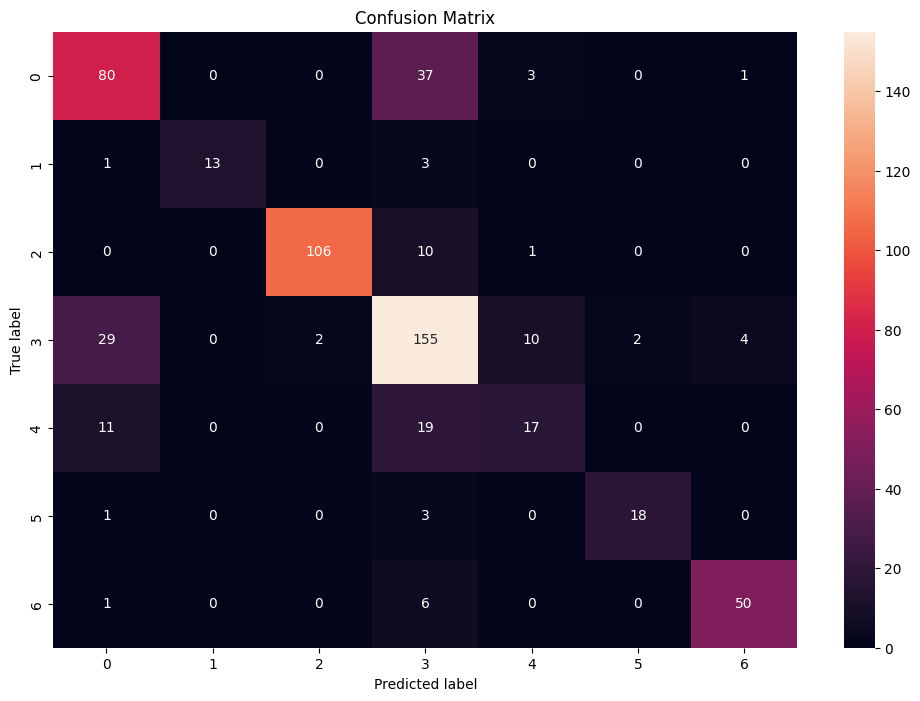

Accuracy Score: 0.75
Classification Report:
               precision    recall  f1-score   support

       Bumps       0.65      0.66      0.66       121
   Dirtiness       1.00      0.76      0.87        17
    K_Scatch       0.98      0.91      0.94       117
Other_Faults       0.67      0.77      0.71       202
      Pastry       0.55      0.36      0.44        47
      Stains       0.90      0.82      0.86        22
   Z_Scratch       0.91      0.88      0.89        57

    accuracy                           0.75       583
   macro avg       0.81      0.74      0.77       583
weighted avg       0.76      0.75      0.75       583



In [65]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the pipeline with the classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=15)),
    ('clf', SVC(C=1, gamma=0.1, kernel='rbf'))  # Using the best parameters found earlier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)
print("Model trained and predictions made...")

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
draw_confusion_matrix(cm)
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))


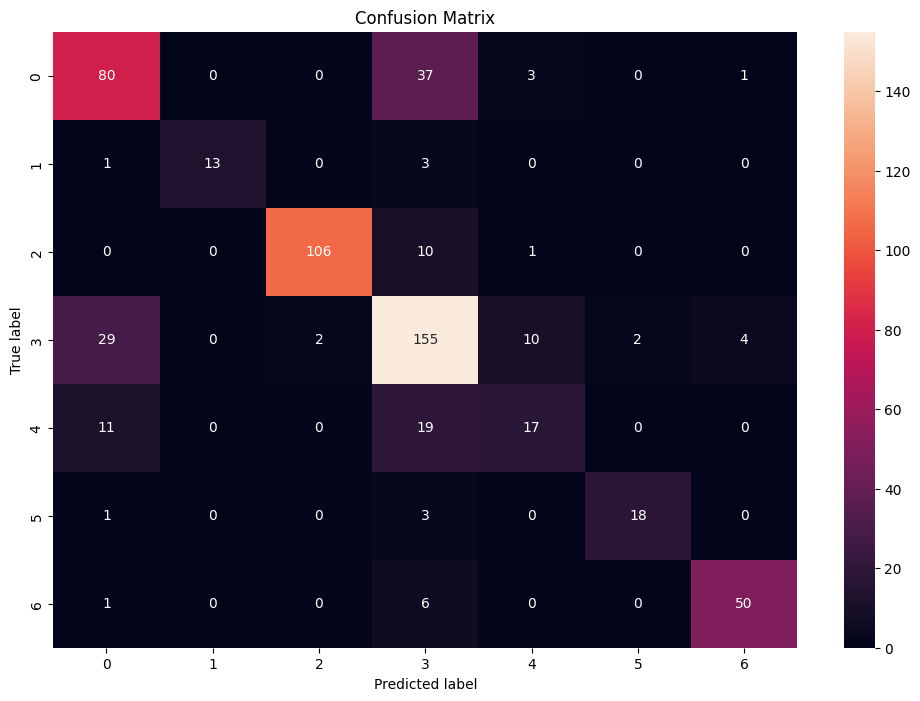

Accuracy Score: 0.75
Classification Report:
               precision    recall  f1-score   support

       Bumps       0.65      0.66      0.66       121
   Dirtiness       1.00      0.76      0.87        17
    K_Scatch       0.98      0.91      0.94       117
Other_Faults       0.67      0.77      0.71       202
      Pastry       0.55      0.36      0.44        47
      Stains       0.90      0.82      0.86        22
   Z_Scratch       0.91      0.88      0.89        57

    accuracy                           0.75       583
   macro avg       0.81      0.74      0.77       583
weighted avg       0.76      0.75      0.75       583



In [66]:
cm = confusion_matrix(y_test, y_pred)
draw_confusion_matrix(cm)
print("Accuracy Score: {:.2f}".format(pipeline.score(X_test, y_test)))
print("Classification Report:\n", classification_report(y_test, y_pred))


#### Gradient Boosting

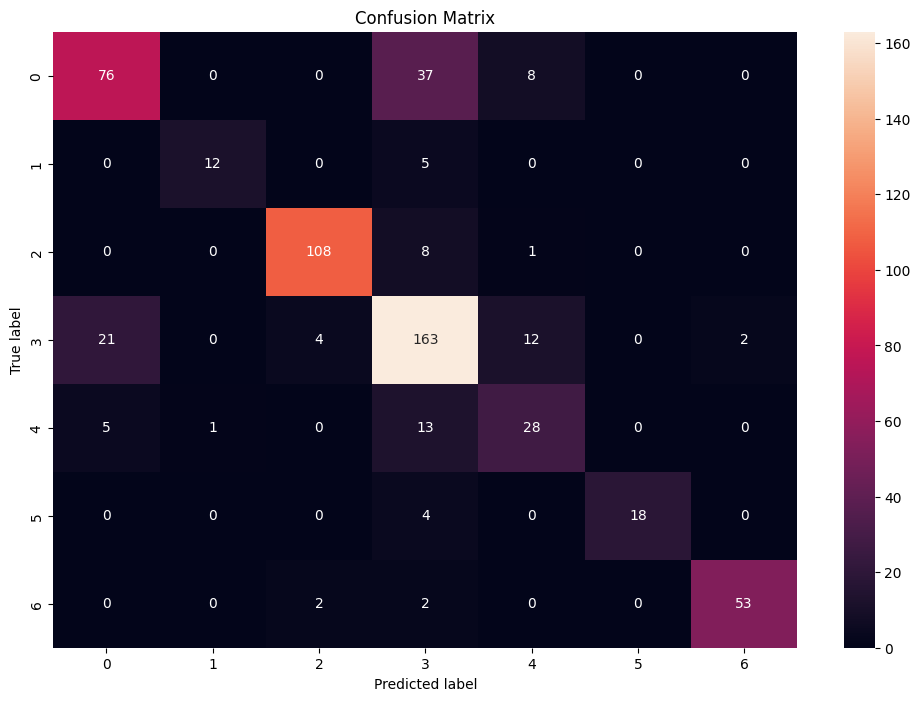

Accuracy Score (Gradient Boosting): 0.79
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

       Bumps       0.75      0.63      0.68       121
   Dirtiness       0.92      0.71      0.80        17
    K_Scatch       0.95      0.92      0.94       117
Other_Faults       0.70      0.81      0.75       202
      Pastry       0.57      0.60      0.58        47
      Stains       1.00      0.82      0.90        22
   Z_Scratch       0.96      0.93      0.95        57

    accuracy                           0.79       583
   macro avg       0.84      0.77      0.80       583
weighted avg       0.79      0.79      0.79       583



In [70]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gbc = gbc.predict(X_test)

# Calculate the confusion matrix, accuracy score, and classification report
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
draw_confusion_matrix(cm_gbc)
print("Accuracy Score (Gradient Boosting): {:.2f}".format(gbc.score(X_test, y_test)))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gbc))


In [77]:
from sklearn.ensemble import RandomForestClassifier

# Define and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

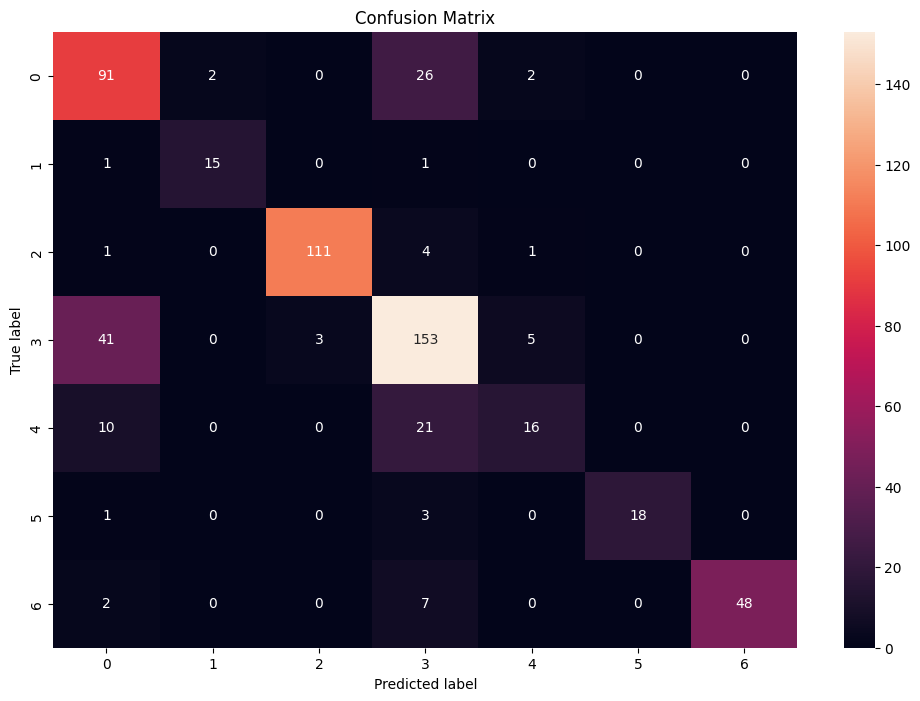

Accuracy Score (Ensemble): 0.78
Classification Report (Ensemble):
               precision    recall  f1-score   support

       Bumps       0.62      0.75      0.68       121
   Dirtiness       0.88      0.88      0.88        17
    K_Scatch       0.97      0.95      0.96       117
Other_Faults       0.71      0.76      0.73       202
      Pastry       0.67      0.34      0.45        47
      Stains       1.00      0.82      0.90        22
   Z_Scratch       1.00      0.84      0.91        57

    accuracy                           0.78       583
   macro avg       0.84      0.76      0.79       583
weighted avg       0.79      0.78      0.77       583



In [79]:
from sklearn.ensemble import VotingClassifier

# Define the individual models
rf_model = RandomForestClassifier(**{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 48})
svc_model = SVC(**{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'})

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('SVC', svc_model)
], voting='hard')  # Use 'hard' voting for majority rule

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate confusion matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Draw confusion matrix
draw_confusion_matrix(cm_ensemble)

# Print accuracy score and classification report
print("Accuracy Score (Ensemble): {:.2f}".format(ensemble_model.score(X_test, y_test)))
print("Classification Report (Ensemble):\n", classification_report(y_test, y_pred_ensemble))
